# SVM и его ядра
__Суммарное количество баллов: 10__


В этом задании нам предстоит решить задачу SVM при помощи `cvxopt` и применить ее к искуственным данным. Затем аналогичным способом нужно будет решить задачу ядерного SVM и исследовать его поведение для различных ядер и значений их параметров.

In [1]:
import numpy as np
import copy
from cvxopt import spmatrix, matrix, solvers
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons, make_blobs
from typing import NoReturn, Callable

solvers.options['show_progress'] = False

In [2]:
def visualize(clf, X, y):
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    x_border = (x_max - x_min) / 20 + 1.0e-3
    x_h = (x_max - x_min + 2 * x_border) / 200
    y_border = (y_max - y_min) / 20 + 1.0e-3
    y_h = (y_max - y_min + 2 * y_border) / 200
    
    cm = plt.cm.Spectral

    xx, yy = np.meshgrid(np.arange(x_min - x_border, x_max + x_border, x_h), np.arange(y_min - y_border, y_max + y_border, y_h))
    mesh = np.c_[xx.ravel(), yy.ravel()]

    z_class = clf.predict(mesh).reshape(xx.shape)

    # Put the result into a color plot
    plt.figure(1, figsize=(8, 8))
    plt.pcolormesh(xx, yy, z_class, cmap=cm, alpha=0.3, shading='gouraud')

    # Plot hyperplane and margin
    z_dist = clf.decision_function(mesh).reshape(xx.shape)
    plt.contour(xx, yy, z_dist, [0.0], colors='black')
    plt.contour(xx, yy, z_dist, [-1.0, 1.0], colors='black', linestyles='dashed')

    # Plot also the training points
    y_pred = clf.predict(X)

    ind_support = []
    ind_correct = []
    ind_incorrect = []
    for i in range(len(y)):
        if i in clf.support:
            ind_support.append(i)
        elif y[i] == y_pred[i]:
            ind_correct.append(i)
        else:
            ind_incorrect.append(i)

    plt.scatter(X[ind_correct, 0], X[ind_correct, 1], c=y[ind_correct], cmap=cm, alpha=1., edgecolor='black', linewidth=.8)
    plt.scatter(X[ind_incorrect, 0], X[ind_incorrect, 1], c=y[ind_incorrect], cmap=cm, alpha=1., marker='*',
               s=50, edgecolor='black', linewidth=.8)
    plt.scatter(X[ind_support, 0], X[ind_support, 1], c=y[ind_support], cmap=cm, alpha=1., edgecolor='yellow', linewidths=1.,
               s=40)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.tight_layout()

In [3]:
def generate_dataset(moons=False):
    if moons:
        X, y = make_moons(1000, noise=0.075, random_state=42)
        return X, 2 * y - 1
    X, y = make_blobs(1000, 2, centers=[[0, 0], [-4, 2], [3.5, -2.0], [3.5, 3.5]], random_state=42)
    y = 2 * (y % 2) - 1
    return X, y
    #return make_classification(1000, 2, 2, 0, flip_y=0.001, class_sep=1.2, scale=0.9, random_state=42)

X, y = generate_dataset(True)

### Задание 1 (4 балла)
Для начала реализуем обычный линейный SVM. 

#### Методы
`fit(X, y)` - обучает SVM, решая задачу оптимизации при помощи `cvxopt.solvers.qp`

`decision_function(X)` - возвращает значение решающей функции (т.е. то число, от которого берем знак с целью узнать класс)

#### Поля
`support` - индексы опорных элементов

In [4]:
from task import LinearSVM

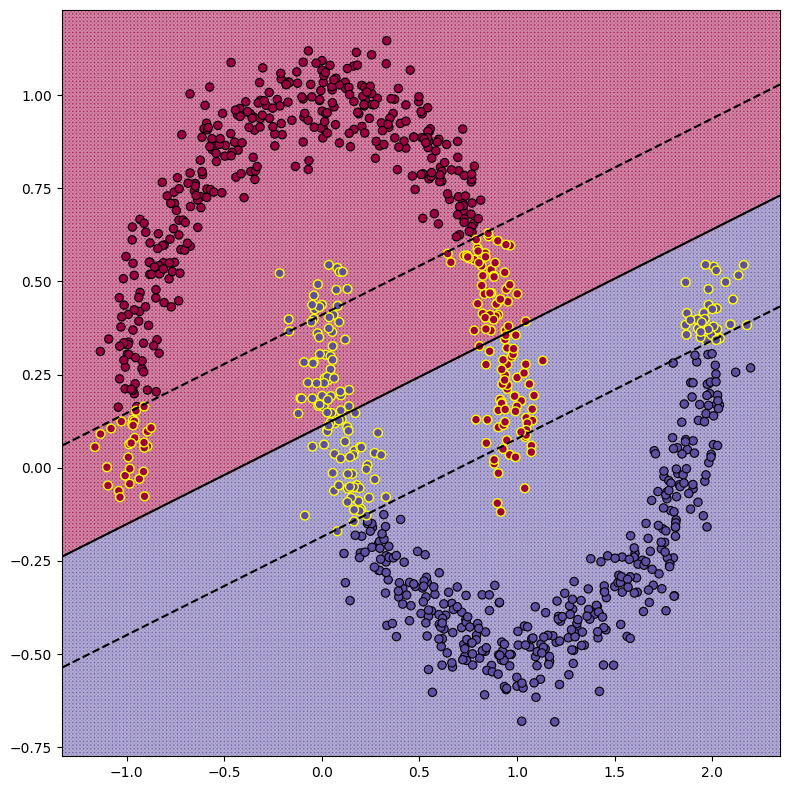

In [5]:
X, y = generate_dataset(True)
svm = LinearSVM(1)
svm.fit(X, y)
visualize(svm, X, y)
plt.show()

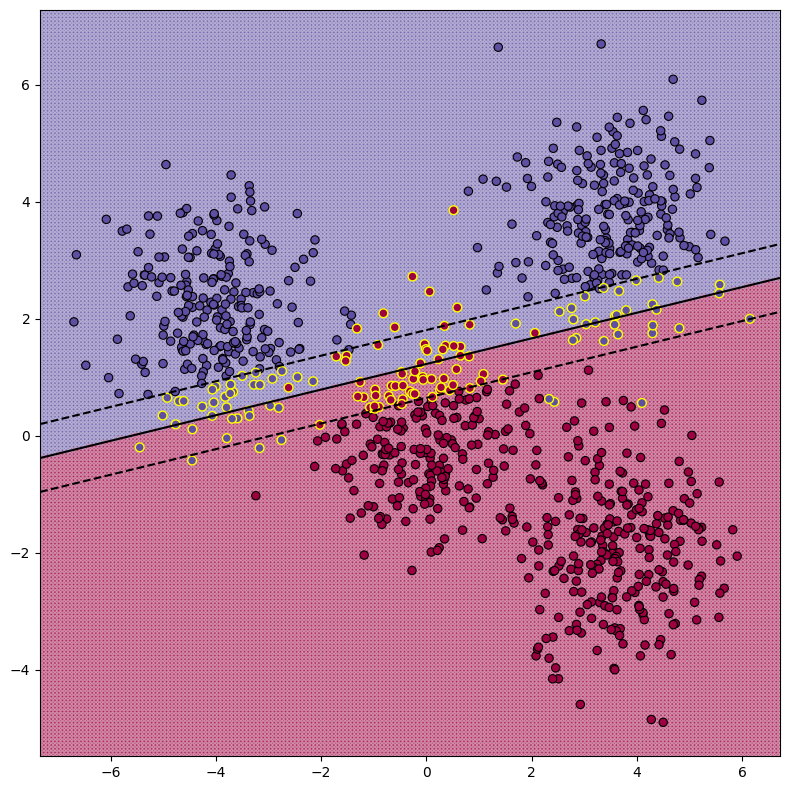

In [6]:
X, y = generate_dataset(False)
svm = LinearSVM(1)
svm.fit(X, y)
visualize(svm, X, y)
plt.show()

### Задание 2 (2 балла)
Перед реализацией ядерного SVM, реализуем функции, которые строят ядра.

#### Описание
`get_polynomial_kernel(power)` - возвращает полиномиальное ядро с заданной константой и степенью

`get_gaussian_kernel(sigma=1.)` - возвращает ядро Гаусса $k(x, y) = e^{ - \sigma \cdot ||x - y||^2}$ с заданным коэффицинтом сигма

Обратите внимание, что первый аргумент ядра должен иметь размерность `(n, m)`, а второй аргумент `m`. Т.е., первый аргумент - набор векторов, а второй аргумент - вектор.

In [7]:
from task import get_polynomial_kernel, get_gaussian_kernel

### Задание 3 (4 балла)
Теперь перейдем к реализации самого kernel SVM.

#### Описание
`fit(X, y)` - обучает kernel SVM, решая задачу оптимизации при помощи `cvxopt.solvers.qp`

`decision_function(X)` - возвращает значение решающей функции (т.е. то число, от которого берем знак с целью узнать класс)

#### Конструктор
`kernel` - ядро-функция

In [8]:
from task import KernelSVM

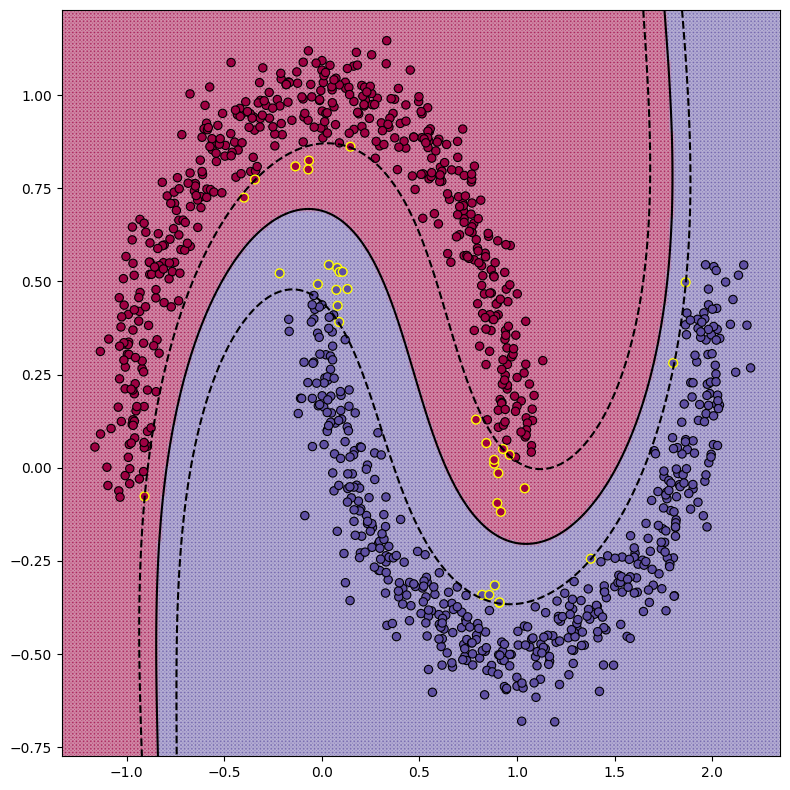

In [9]:
X, y = generate_dataset(True)
svm = KernelSVM(1, kernel=get_polynomial_kernel(1, 3))
svm.fit(X, y)
visualize(svm, X, y)
plt.show()

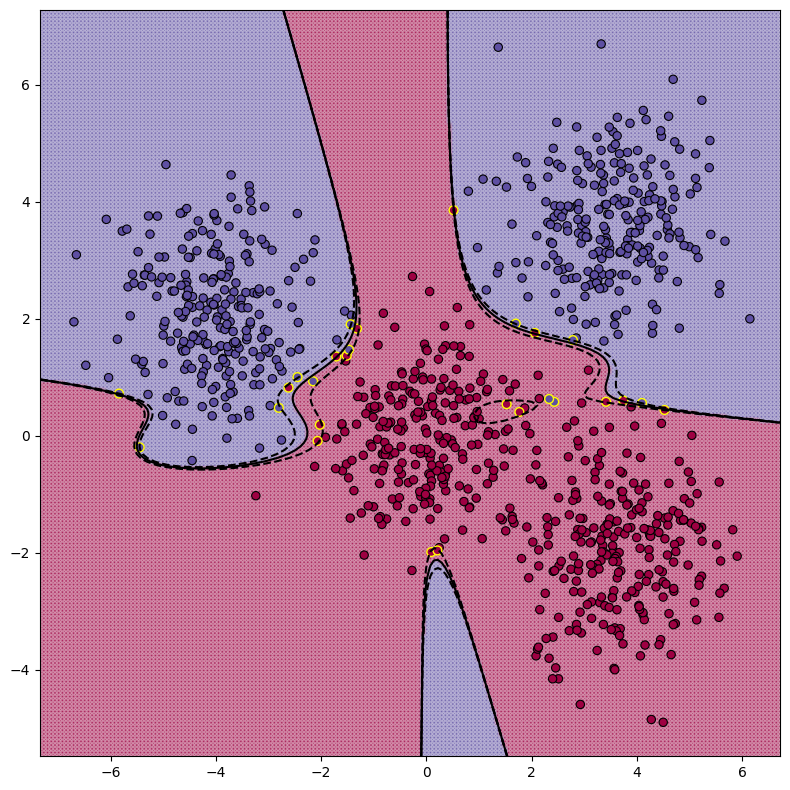

In [10]:
X, y = generate_dataset(False)
svm1 = KernelSVM(1, kernel=get_polynomial_kernel(1, 5))
svm1.fit(X, y)
visualize(svm1, X, y)
plt.show()

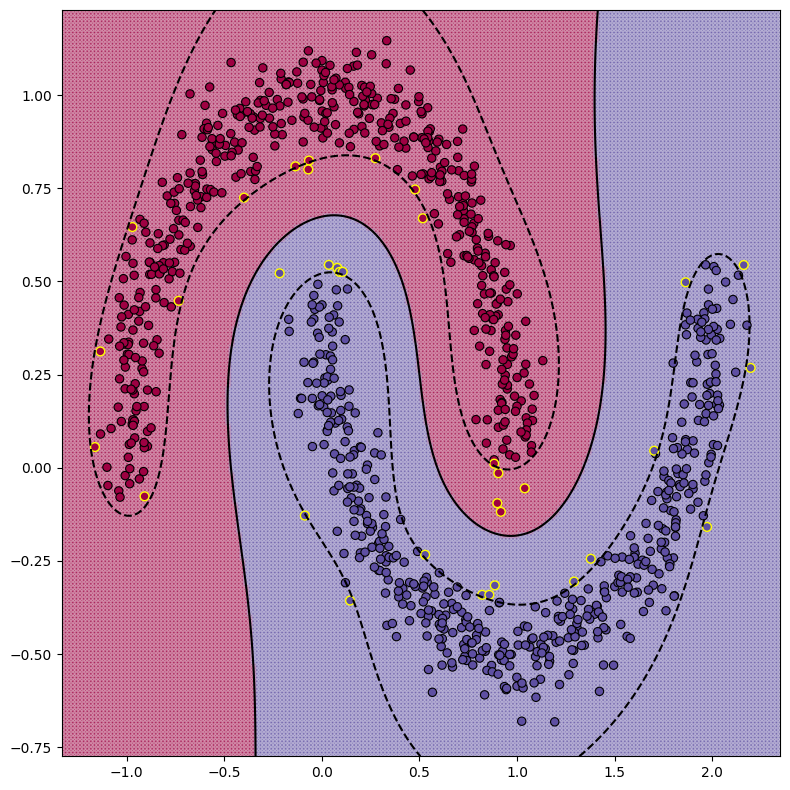

In [11]:
X, y = generate_dataset(True)
svm = KernelSVM(1, kernel=get_gaussian_kernel(0.4))
svm.fit(X, y)
visualize(svm, X, y)
plt.show()

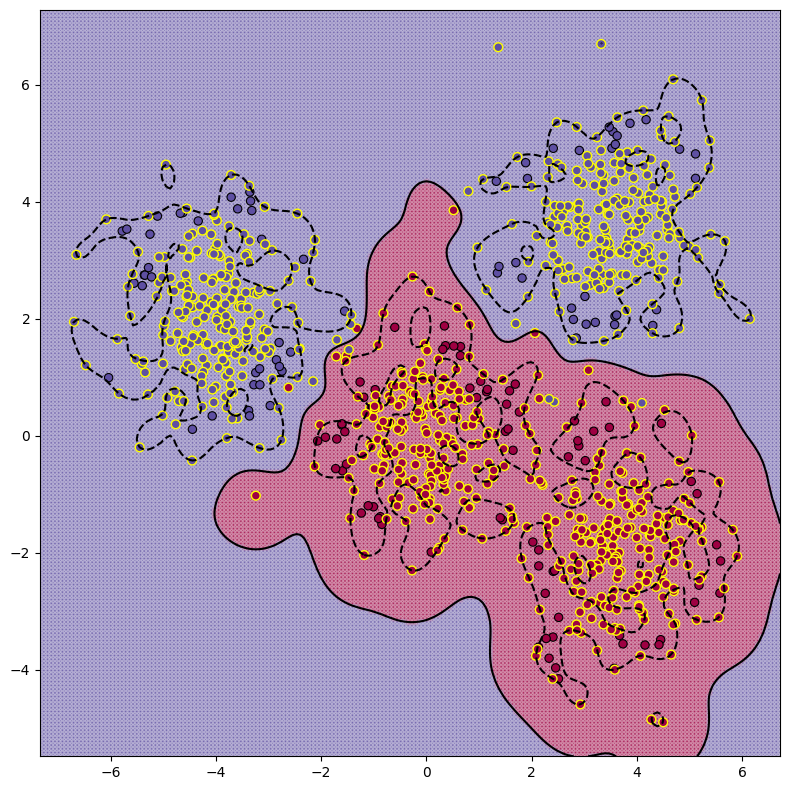

In [268]:
X, y = generate_dataset(False)
svm = KernelSVM(1, kernel=get_gaussian_kernel(0.4))
svm.fit(X, y)
visualize(svm, X, y)
plt.show()

In [12]:
X

array([[-0.03642046,  0.42519235],
       [ 1.00435868, -0.43903211],
       [ 0.88597534, -0.31567332],
       ...,
       [ 1.67342186, -0.32807099],
       [-0.95538001,  0.29578284],
       [ 0.79089189,  0.61219058]])

In [13]:
X[0]

array([-0.03642046,  0.42519235])

In [14]:
svm.decision_function(X[0])

array([1.42665036])

In [15]:
svm1.decision_function(X[0])

AxisError: axis 1 is out of bounds for array of dimension 1

In [17]:
get_polynomial_kernel()(a,b).shape

(599, 1)

In [21]:
a.ndim

2

In [152]:
def get_polynomial_kernel(c=1, power=2):
    "Возвращает полиномиальное ядро с заданной константой и степенью"
    def polynomial_kernel(x, y, c=c, power=power):
        return (x @ y.T + c) ** power
    return polynomial_kernel
get_polynomial_kernel()(np.array([1,2,3]),np.array([1,2,3])).shape

()

In [120]:
pairwise_kernels(y.reshape((-1,1)), y.reshape((-1,1)), metric="poly", degree=2, coef0=1).shape

(1000, 1000)

In [161]:
def gaussain_kernel(x, y, l=1):
    k = np.exp(-(np.subtract.outer(x,y)**2)/(2*l**2))
    
    return k
gaussain_kernel(a,a).shape

(599, 2, 599, 2)

In [172]:
a = b

In [173]:
a, b

(array([-0.29406128,  0.06362709]), array([-0.29406128,  0.06362709]))

In [174]:
features = min(list(a.shape)+ list(b.shape))

In [175]:
a.reshape((-1,features))

array([[-0.29406128,  0.06362709]])

In [177]:
get_gaussian_kernel()(a,b)

array(1.)

In [228]:
a = np.random.randn(5,2)
b = np.random.rand(2)

In [229]:
a

array([[-0.6706158 , -0.13191386],
       [ 0.18352736, -1.08296961],
       [ 0.03271663, -1.43678619],
       [ 0.99702291,  0.7387449 ],
       [-0.86203665,  1.6932075 ]])

In [242]:
def get_gaussian_kernel(sigma=1.):
    "Возвращает ядро Гаусса с заданным коэффициентом sigma"
    def gaussian_kernel(x, y, sigma=sigma):
        if (x.ndim == 1 and y.ndim > 1) or (y.ndim == 1 and x.ndim > 1) or (x.ndim == 1 and y.ndim == 1 and len(x) == len(y)):
            features = min(x.shape[-1], y.shape[-1])
            x = x.reshape((-1, features))
            y = y.reshape((-1, features))
        result = np.exp(- (np.sum(x**2, axis=1)[:, np.newaxis] + np.sum(y**2, axis=1) - 2 * x @ y.T) / (2 * sigma ** 2))
        if x.shape[0] == 1 or y.shape[0] == 1:
            result = np.squeeze(result)       
        return result
    return gaussian_kernel
get_gaussian_kernel()(a,a,sigma=0.771554658972087)

array([[1.00000000e+00, 2.53477078e-01, 1.57929270e-01, 5.11740377e-02,
        5.90956259e-02],
       [2.53477078e-01, 1.00000000e+00, 8.83159875e-01, 3.53229213e-02,
        6.16421926e-04],
       [1.57929270e-01, 8.83159875e-01, 1.00000000e+00, 8.59733354e-03,
        1.36255578e-04],
       [5.11740377e-02, 3.53229213e-02, 8.59733354e-03, 1.00000000e+00,
        2.55273559e-02],
       [5.90956259e-02, 6.16421926e-04, 1.36255578e-04, 2.55273559e-02,
        1.00000000e+00]])

In [248]:
import numpy as np

def get_gaussian_kernel(sigma=1.):
    "Возвращает ядро Гаусса с заданным коэффициентом sigma"
    def gaussian_kernel(x, y, sigma=sigma):
        x, y = np.atleast_2d(x), np.atleast_2d(y)
        result = np.exp(- (np.sum(x**2, axis=1)[:, np.newaxis] + np.sum(y**2, axis=1) - 2 * x @ y.T) / (2 * sigma ** 2))
        if x.shape[0] == 1 or y.shape[0] == 1:
            result = np.squeeze(result)
        return result
    return gaussian_kernel
get_gaussian_kernel()(b,b,sigma=0.771554658972087)

array(1.)

In [251]:
from sklearn.metrics.pairwise import rbf_kernel

x = np.random.randn(5, 3)
y = np.random.randn(4, 3)

gauss_kernel = get_gaussian_kernel(sigma=0.771554658972087)
my_rbf = gauss_kernel(x, y)
sklearn_rbf = rbf_kernel(x, y, gamma=1 / (2 * 0.771554658972087**2))

print("Разница с sklearn:", np.max(np.abs(my_rbf - sklearn_rbf)))


Разница с sklearn: 1.1102230246251565e-16


In [243]:
pairwise_kernels(a, a, metric="rbf", gamma=1 / (2 * 0.771554658972087**2))

array([[1.00000000e+00, 2.53477078e-01, 1.57929270e-01, 5.11740377e-02,
        5.90956259e-02],
       [2.53477078e-01, 1.00000000e+00, 8.83159875e-01, 3.53229213e-02,
        6.16421926e-04],
       [1.57929270e-01, 8.83159875e-01, 1.00000000e+00, 8.59733354e-03,
        1.36255578e-04],
       [5.11740377e-02, 3.53229213e-02, 8.59733354e-03, 1.00000000e+00,
        2.55273559e-02],
       [5.90956259e-02, 6.16421926e-04, 1.36255578e-04, 2.55273559e-02,
        1.00000000e+00]])

In [250]:
get_polynomial_kernel()(b,b)

1.3723358449225826

In [86]:
import numpy as np
from sklearn.metrics.pairwise import pairwise_kernels

# Создаём случайные данные
x = np.random.randn(5, 3)
y = np.random.randn(4, 3)

# Полиномиальное ядро из sklearn
sklearn_poly = pairwise_kernels(x, y, metric="poly", degree=2, coef0=1)

# Гауссово (RBF) ядро из sklearn
sklearn_rbf = pairwise_kernels(x, y, metric="rbf", gamma=1 / (2 * 1**2))

print("Sklearn Polynomial Kernel:\n", sklearn_poly)
print("Sklearn Gaussian (RBF) Kernel:\n", sklearn_rbf)

Sklearn Polynomial Kernel:
 [[1.77024688e+00 6.48541882e-01 1.27552632e+00 2.31419637e+00]
 [2.92158874e-01 2.60132207e+00 4.16236637e-01 3.46634152e-01]
 [1.66542749e+00 5.73945485e-01 8.01973113e-01 2.34916087e-03]
 [7.18160169e-01 1.79276933e+00 5.27156127e-01 2.79673586e-01]
 [1.45843791e+00 5.63794953e-01 1.03876368e+00 2.92900733e-01]]
Sklearn Gaussian (RBF) Kernel:
 [[8.73780716e-01 1.71567905e-01 5.60769450e-01 7.78809753e-02]
 [3.16039626e-02 7.48462189e-01 5.07568238e-02 1.83698618e-03]
 [2.62801508e-01 5.04174296e-02 9.42798436e-02 3.18346871e-04]
 [2.01304711e-01 8.34660776e-01 1.64100405e-01 3.89284844e-03]
 [5.49129044e-01 1.32376919e-01 3.66051933e-01 3.74003376e-03]]


In [17]:
np.exp(- sigma * (np.sum(x**2, axis=1)[:, np.newaxis] + np.sum(y**2, axis=1) - 2 * x @ y.T))

NameError: name 'x' is not defined

In [159]:
a = np.random.randn(599, 2)
b = np.random.randn(2)

In [27]:
a

array([[-0.72919122,  0.4598877 ],
       [ 0.24382182,  0.29666785],
       [ 0.19760397, -0.58446854],
       ...,
       [-0.43752367, -0.45850236],
       [-0.58663008,  1.14438291],
       [-0.17201059,  0.29003059]])

In [72]:
b.T

array([[-1.19821896, -0.93303106]])

In [71]:
(a @ b).shape

(599, 1)

In [45]:
a.T

array([[-0.72919122,  0.24382182,  0.19760397, ..., -0.43752367,
        -0.58663008, -0.17201059],
       [ 0.4598877 ,  0.29666785, -0.58446854, ..., -0.45850236,
         1.14438291,  0.29003059]])

In [73]:
np.dot(a, b)

array([[ 1.22258593e+00],
       [-4.11987229e-03],
       [ 3.23153295e+00],
       [ 5.67706867e-01],
       [-1.14583906e+00],
       [ 3.80096333e-01],
       [ 7.99104136e-01],
       [ 1.37055292e+00],
       [-1.18281414e+00],
       [-5.19370916e-01],
       [ 6.27673912e-01],
       [ 7.36984643e-02],
       [ 2.35867540e+00],
       [ 2.19375297e+00],
       [ 1.91004722e+00],
       [ 2.63274733e+00],
       [ 6.89172927e-01],
       [ 1.50672045e+00],
       [-3.78063596e+00],
       [-2.18430891e+00],
       [-1.00327803e+00],
       [ 3.60829992e+00],
       [-5.29424171e-01],
       [ 2.86573739e+00],
       [ 8.68284281e-01],
       [-2.31502835e-01],
       [ 1.66036253e+00],
       [-5.75130199e-01],
       [ 1.83660341e+00],
       [ 2.65568371e+00],
       [-9.41623184e-01],
       [ 5.64594286e-01],
       [-2.51305418e+00],
       [-3.67952921e-01],
       [ 3.50484754e-01],
       [-4.29582860e-01],
       [-3.43322034e+00],
       [ 1.43583092e-01],
       [ 9.7

In [64]:
import numpy as np

def rbf_kernel(X, Y, gamma=1.0):
    """
    Вычисляет RBF (гауссово) ядро между двумя наборами векторов X и Y.

    Parameters:
    - X: numpy.ndarray формы (n_samples1, n_features)
    - Y: numpy.ndarray формы (n_samples2, n_features)
    - gamma: Параметр ядра.

    Returns:
    - Матрица ядра формы (n_samples1, n_samples2)
    """
    X = np.atleast_2d(X)  # Преобразуем в 2D (если 1D)
    Y = np.atleast_2d(Y)

    # Вычисляем ||X||^2 и ||Y||^2
    X_sq_norms = np.sum(X ** 2, axis=1)[:, None]  # (n_samples1, 1)
    Y_sq_norms = np.sum(Y ** 2, axis=1)[None, :]  # (1, n_samples2)

    # Вычисляем попарные расстояния
    squared_distances = X_sq_norms + Y_sq_norms - 2 * np.dot(X, Y.T)  # (n_samples1, n_samples2)
    
    return np.exp(-squared_distances / (2 * gamma))

# ✅ Пример 1 (оба массива 599x2)
a = np.random.randn(599, 2)
b = np.random.randn(599, 2)
kernel_matrix = rbf_kernel(a, b)
print(kernel_matrix.shape)  # (599, 599)

# ✅ Пример 2 (один вектор 1x2, сравнение с 599x2)
c = np.random.randn(1, 2)  # Вектор формы (1, 2)
kernel_matrix2 = rbf_kernel(a, c)
print(kernel_matrix2.shape)  # (599, 1)

# ✅ Пример 3 (один вектор 2x1 → сначала транспонируем)
d = np.random.randn(2, 1).T  # Приводим к (1, 2)
kernel_matrix3 = rbf_kernel(a, d)
print(kernel_matrix3.shape)  # (599, 1)


(599, 599)
(599, 1)
(599, 1)


In [68]:
kernel_matrix = rbf_kernel(a,b)

ValueError: operands could not be broadcast together with shapes (599,2) (2,1) 

In [69]:
X_norm = np.sum(a**2, axis=1)[:, np.newaxis]  # (n_samples_1, 1)
Y_norm = np.sum(b**2, axis=1)[np.newaxis, :]  # (1, n_samples_2)
    
squared_distances = X_norm + Y_norm - 2 * np.dot(a, b.T)  # (n_samples_1, n_samples_2)

ValueError: shapes (599,2) and (1,2) not aligned: 2 (dim 1) != 1 (dim 0)

In [70]:
[a b]
[[a] [b]]


SyntaxError: invalid syntax. Perhaps you forgot a comma? (866945353.py, line 1)